In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
df = pd.read_csv("heart_attack_risk_dataset.csv")#read the data as pandas dataframe
print(df.describe())

                Age       Smoking  Alcohol_Consumption           BMI  \
count  50000.000000  50000.000000         50000.000000  50000.000000   
mean      53.398700      0.298420             0.401980     27.519357   
std       20.799006      0.457569             0.490303      7.225176   
min       18.000000      0.000000             0.000000     15.000000   
25%       35.000000      0.000000             0.000000     21.270000   
50%       53.000000      0.000000             0.000000     27.540000   
75%       71.000000      1.000000             1.000000     33.770000   
max       89.000000      1.000000             1.000000     40.000000   

           Diabetes  Hypertension  Cholesterol_Level    Resting_BP  \
count  50000.000000   50000.00000       50000.000000  50000.000000   
mean       0.198840       0.29738         225.036444    134.434100   
std        0.399131       0.45711          43.317373     25.907961   
min        0.000000       0.00000         150.000000     90.000000   
2

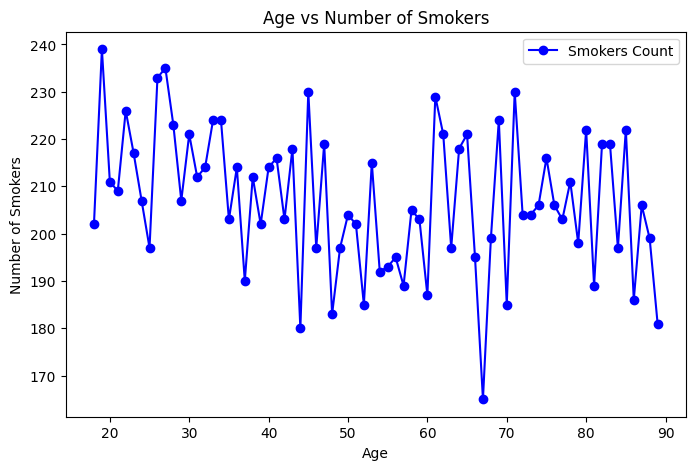

In [17]:
if "Age" in df.columns and "Smoking" in df.columns:
    # Filter only positive smokers (Smoking == 1)
    smokers = df[df["Smoking"] == 1]

    # Count the number of smokers by Age
    age_counts = smokers["Age"].value_counts().sort_index()

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(age_counts.index, age_counts.values, marker="o", linestyle="-", color="b", label="Smokers Count")
    
    # Labels and Title
    plt.xlabel("Age")
    plt.ylabel("Number of Smokers")
    plt.title("Age vs Number of Smokers")
    plt.legend()
    
    # Show the graph
    plt.show()

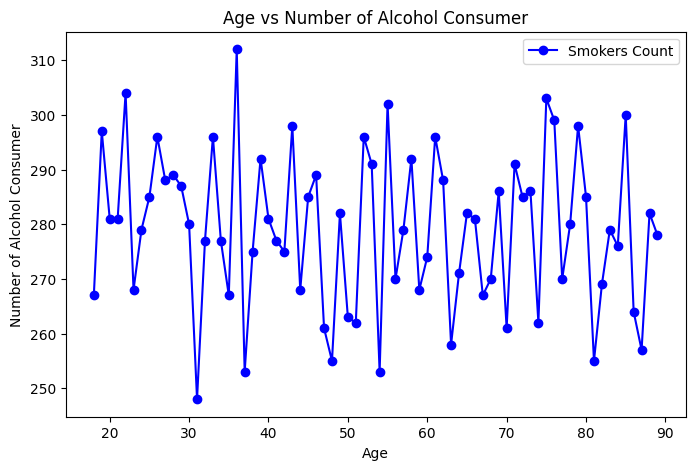

In [20]:
if "Age" in df.columns and "Alcohol_Consumption" in df.columns:
    # Filter only positive smokers (Smoking == 1)
    alcohol = df[df["Alcohol_Consumption"] == 1]

    # Count the number of alcohol consuming user by Age
    age_counts = alcohol["Age"].value_counts().sort_index()

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(age_counts.index, age_counts.values, marker="o", linestyle="-", color="b", label="Smokers Count")
    
    # Labels and Title
    plt.xlabel("Age")
    plt.ylabel("Number of Alcohol Consumer")
    plt.title("Age vs Number of Alcohol Consumer")
    plt.legend()
    
    # Show the graph
    plt.show()

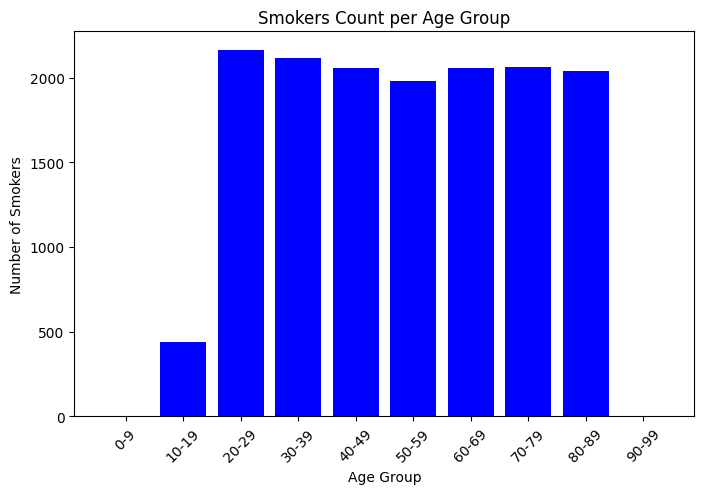

In [23]:
smokers = df[df["Smoking"] == 1].copy()

# Define age bins (0-9, 10-19, ..., 90-99)
bins = list(range(0, 101, 10))
labels = [f"{i}-{i+9}" for i in bins[:-1]]

# Assign each age to a bin using .loc[] to avoid warnings
smokers.loc[:, "Age Group"] = pd.cut(smokers["Age"], bins=bins, labels=labels, right=False)

# Count smokers in each age group
age_group_counts = smokers["Age Group"].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(8, 5))
plt.bar(age_group_counts.index, age_group_counts.values, color="b")
plt.xlabel("Age Group")
plt.ylabel("Number of Smokers")
plt.title("Smokers Count per Age Group")
plt.xticks(rotation=45)
plt.show()

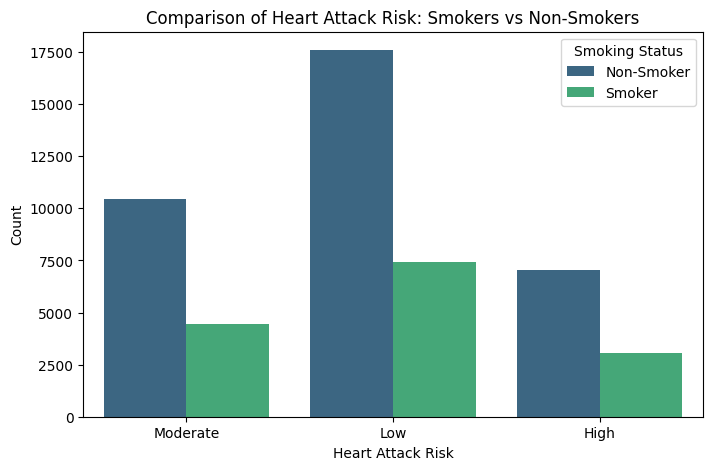

In [39]:
if "Smoking" in df.columns and "Heart_Attack_Risk" in df.columns:
    # Add a new column for smoking status
    df['Smoking Status'] = df['Smoking'].apply(lambda x: 'Smoker' if x == 1 else 'Non-Smoker')

    # Plot count of heart attack risk by smoking status
    plt.figure(figsize=(8, 5))
    sns.countplot(x="Heart_Attack_Risk", hue="Smoking Status", data=df, palette="viridis")
    
    # Labels and Title
    plt.xlabel("Heart Attack Risk")
    plt.ylabel("Count")
    plt.title("Comparison of Heart Attack Risk: Smokers vs Non-Smokers")
    plt.show()